## Test of vulipani phase processing

In [1]:
import pyart
import numpy as np
from scipy import ndimage, interpolate
from matplotlib import pyplot as plt
%matplotlib inline
from netCDF4 import Dataset


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
input_file = '/home/rjackson/data/radar/cfrad.20110202_071003.000_to_20110202_071849.000_CPOL_PPI_level1b.nc'

/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:02:46.041349. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [4]:
radar = pyart.io.read(input_file)
radar.info()

/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:02:58.688057. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: RuntimeWarning: invalid value encountered in less
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: RuntimeWarning: invalid value encountered in greater
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: altitude
	units: meters
	_FillValue: -9999.0
	positive: up
altitude_agl:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: altitude_above_ground_level
	units: meters
	_FillValue: -9999.0
	positive: up
antenna_transition:
	data: <ndarray of type: int8 and shape: (5400,)>
	long_name: antenna_is_in_transition_between_sweeps
	units: 
	_FillValue: -128
	comment: 1 if antenna is in transition, 0 otherwise
azimuth:
	data: <ndarray of type: float32 and shape: (5400,)>
	long_name: ray_azimuth_angle
	units: degrees
	_FillValue: -9999.0
elevation:
	data: <ndarray of type: float32 and shape: (5400,)>
	long_name: ray_elevation_angle
	units: degrees
	_FillValue: -9999.0
	positive: up
fields:
	temperature:
		data: <ndarray of type: float64 and shape: (5400, 597)>
		long_name: Sounding temperature at gate
		units: degrees Celsius
		standard_name: temperature
		valid_min: -100
		valid_max: 100
		comment: Radiosounding d

## Derive pseudo-NCP

In [5]:
print('Calculating texture....')
nyq_Gunn = radar.instrument_parameters['nyquist_velocity']['data'][0]
data = ndimage.filters.generic_filter(radar.fields['velocity']['data'],
                                      pyart.util.interval_std, size = (3,3),
                                      extra_arguments = (-nyq_Gunn, nyq_Gunn))
filtered_data = ndimage.filters.median_filter(data, size = (3,3))
texture_field = pyart.config.get_metadata('corrected_velocity')
texture_field['data'] = filtered_data
texture_field['data'] = filtered_data
radar.add_field('velocity_texture', texture_field, replace_existing = True)

Calculating texture....


/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:03:03.052226. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:00:03.897715. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'p.d.f')

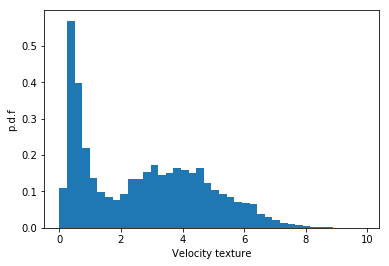

In [5]:
texture = radar.fields['velocity_texture']['data']
plt.hist(texture[texture > 0], normed=1, bins=40)
plt.xlabel('Velocity texture')
plt.ylabel('p.d.f')

In [6]:
## For testing, assume zero psi_dp field
psidp = np.zeros(texture.shape)
radar.add_field_like('PHIDP', 'PSIDP', NCP, replace_existing = True)

/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:00:04.442203. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


NameError: name 'NCP' is not defined

/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:00:05.154249. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:00:06.307882. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [7]:
NCP = np.zeros(texture.shape)
NCP[texture < 2] = 1
radar.add_field_like('velocity_texture', 'normalized_coherent_power', NCP, replace_existing = True)
display = pyart.graph.RadarDisplay(radar)
plt.figure(figsize=(6,6))
display.plot_ppi('bringi_differential_phase', vmin=0, vmax=360, cmap=pyart.graph.cm.NWSRef, gatefilter=gatefilter)
plt.xlim([-50,50])
plt.ylim([-50,50])

/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:01:36.746285. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


NameError: name 'gatefilter' is not defined

<Figure size 432x432 with 0 Axes>

## Derive KDP

In [45]:
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_above('velocity_texture', 2)
gatefilter.exclude_below('cross_correlation_ratio', 0.9)
gatefilter.exclude_masked('corrected_reflectivity')
gatefilter = pyart.correct.despeckle_field(radar, 'corrected_reflectivity', gatefilter=gatefilter, size=30)
#filter_dict = {}
#filter_dict['rhohv_field'] = 'RHOHV'


kdp_dict = pyart.correct.phase_proc_lp_gf(radar, gatefilter=gatefilter, min_rhv=0.95,
                              LP_solver='cylp', refl_field='corrected_reflectivity')
print(kdp_dict)

/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:16:15.725434. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/rjackson/.local/lib/python3.6/site-packages/pyart/correct/despeckle.py:417: RuntimeWarning: invalid value encountered in less
  cond = np.logical_or(data < tlo, data == BAD)


TypeError: phase_proc_lp_gf() got multiple values for argument 'gatefilter'

In [36]:
radar.add_field('specific_differential_phase', kdp_dict[1], replace_existing = True)
radar.add_field('corrected_differential_phase', kdp_dict[0], replace_existing = True)

/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:13:31.695019. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/rjackson/anaconda3/envs/lp_gatefiltertest/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-08-24 15:14:32.439363. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


(-50, 50)

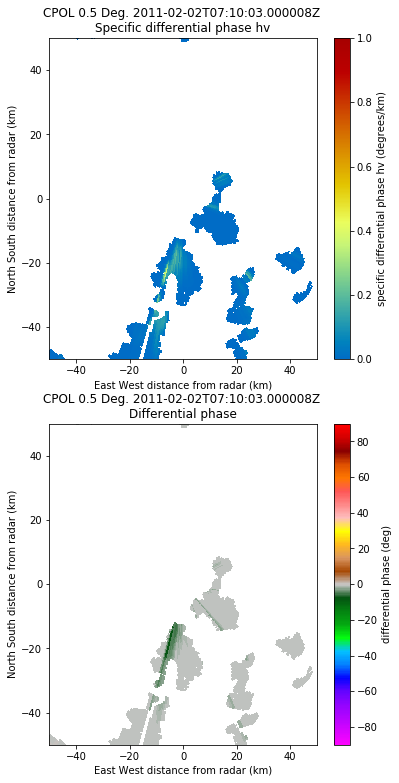

In [43]:
plt.figure(figsize=(6,13))
plt.subplot(212)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('corrected_differential_phase', vmin=-90, vmax=90, gatefilter=gatefilter,)
plt.xlim([-50,50])
plt.ylim([-50,50])

plt.subplot(211)
display.plot_ppi('specific_differential_phase', vmin=0, vmax=1, gatefilter=gatefilter,
                 cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
plt.xlim([-50,50])
plt.ylim([-50,50])

In [67]:
altitudes = radar.gate_altitude['data']

sounding_input_file = '/home/rjackson/data/soundings/twpsondewnpnC3.b1.20111202.111900.custom.cdf'
Sounding_netcdf = Dataset(sounding_input_file, mode='r')

# Convert timestamps to datetime format
Time = Sounding_netcdf.variables['time_offset'][:]
base_time = Sounding_netcdf.variables['base_time'][:]
alt = Sounding_netcdf.variables['alt'][:]
u = Sounding_netcdf.variables['u_wind'][:]
v = Sounding_netcdf.variables['v_wind'][:]
t = Sounding_netcdf.variables['tdry'][:]

function = interpolate.interp1d(alt,t,bounds_error=False)
temp = np.zeros(altitudes.shape)

for j in range(0,592):
    temp[:,j] = function(altitudes[:,j])

radar.add_field_like('specific_differential_phase', 
                     'temperature', temp, replace_existing = True)
display.plot_ppi('temperature', vmin=-20, vmax=30, sweep=2,
                 cmap=pyart.graph.cm.NWSRef)
#plt.plot(alt,t)

/home/rjackson/anaconda3/envs/jordi_pyart/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-05 11:18:12.102396. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


ValueError: field specific_differential_phase does not exist in object

In [12]:
hydrometeor_class = pyart.retrieve.hydroclass_semisupervised(radar, 
                                                             refl_field='Refl',
                                                             rhv_field='RHOHV',
                                                             temp_field='temperature',
                                                             zdr_field='ZDR',
                                                             kdp_field='corrected_differential_phase',
                                                             weights=np.array([1.0, 
                                                                               0.75,
                                                                               1.,
                                                                               0.75,
                                                                               0.5]))
radar.add_field('hydrometeor_class', hydrometeor_class, replace_existing=True)

/home/rjackson/anaconda3/envs/pyart/lib/python2.7/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


{'units': 'legend', 'long_name': 'Radar Echo classification', 'standard_name': 'radar_echo_classification', 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [3, 3, 0, ..., 0, 0, 0],
       [3, 3, 0, ..., 0, 0, 0],
       [3, 3, 0, ..., 0, 0, 0]]), 'coordinates': 'elevation azimuth range'}
{'units': 'legend', 'long_name': 'Radar Echo classification', 'standard_name': 'radar_echo_classification', 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [3, 3, 0, ..., 0, 0, 0],
       [3, 3, 0, ..., 0, 0, 0],
       [3, 3, 0, ..., 0, 0, 0]]), 'coordinates': 'elevation azimuth range'}


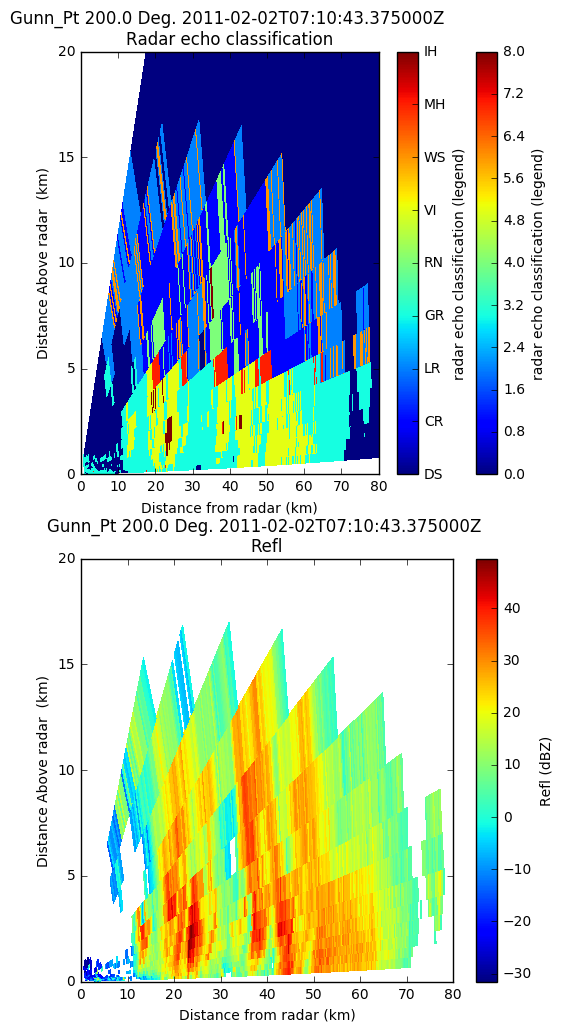

In [13]:
radar_xsection = pyart.util.cross_section_ppi(radar, [200])

display_xsection = pyart.graph.RadarMapDisplay(radar_xsection)
plt.figure(figsize=(6,12))
plt.subplot(211)
display_xsection.plot_rhi('hydrometeor_class',
                          vmin=0,
                          vmax=8)
plt.ylim([0,20])
plt.xlim([0,80])
print(np.max(hydrometeor_class))
display_xsection.plot_colorbar(ticks=[0,1,2,3,4,5,6,7,8],
                               ticklabs=['DS','CR', 
                                         'LR','GR',
                                         'RN','VI',
                                         'WS','MH',
                                         'IH'])

plt.subplot(212)
display_xsection.plot_rhi('Refl')
plt.ylim([0,20])
plt.xlim([0,80])
print(hydrometeor_class)
